# Bank Data Analysis

# Objective

In this case study, you will be working on Banking Data Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to give you hands-on experience in analyzing large-scale banking datasets using PySpark and AWS services. You will apply techniques learned in data analytics to clean, transform, and explore banking data, drawing meaningful insights to support financial decision-making. Apart from understanding how big data tools can optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing market capitalization trends, currency conversions, and global banking performance. Additionally, you will use AWS S3 to store the processed data once the ETL pipeline is complete, ensuring efficient data management and retrieval.


# Business Value

The banking industry operates in a highly competitive and globalized market where financial institutions must continuously monitor their market position, performance, and currency fluctuations. To stay competitive, banks must leverage data-driven insights to optimize their financial strategies, assess market trends, and make informed decisions. In this assignment, you will analyze banking data to uncover patterns in market capitalization, currency conversions, and global rankings. With Apache Spark's ability to handle large datasets efficiently, financial institutions can process vast amounts of data in real-time, helping them make faster and more informed decisions.


As an analyst at a financial institution, your task is to examine historical banking data to derive actionable insights that can drive strategic growth. Your analysis will help identify the top 10 largest banks by market capitalization, convert market cap values into multiple currencies (USD, GBP, EUR, INR), and store the processed data for easy retrieval. To enhance scalability and accessibility, you will utilize AWS S3 for data storage, ensuring seamless integration with cloud-based analytics tools. By leveraging big data analytics and cloud services, financial institutions can streamline operations, enhance decision-making, and maximize revenue opportunities.


# Dataset

The data for this project can be accessed from the following [wikipedia link](https://web.archive.org/web/20230908091635/https://en.wikipedia.org/wiki/List_of_largest_banks).

The dataset used in this analysis comprises global banking data extracted from a Wikipedia page (List of Largest Banks) archived as of September 2023.

It includes rankings of the world's largest banks based on market capitalization (in USD billions) and is structured into a single table with three columns. The data was scraped programmatically, cleaned, and transformed using PySpark to support cross-currency analysis. Exchange rate data (for USD, GBP, EUR, and INR) was sourced from a CSV file to enable currency conversions. The processed dataset is stored in CSV and SQLite formats for accessibility and efficient querying.

The dataset consists of a single table (Largest_banks) with the following three key attributes:
- **Rank:** Numerical position of the bank based on market capitalization.
- **Bank Name:** Name of the financial institution.
- **Market Cap (USD Billion):** Market valuation of the bank in USD billions.
This dataset enables analysis of global banking trends, cross-currency valuations, and the relative market dominance of financial institutions.

An additional data on market exchange rates is available to compare the marketcap dealing with different currencies.


<h2>Assignment Tasks</h2>

<ol>
    <li>
        <strong>Data Preparation</strong>
        <p>The dataset consists of a structured table containing global banking data. Before performing any analysis, it is crucial to prepare the data to ensure consistency and efficiency in processing.</p>
        Check for data consistency and ensure all columns are correctly formatted.<br>
        Structure and prepare the data for further processing and analysis.<br>
</br>
    <li>
        <strong>Data Cleaning</strong>
        <ul>
            2.1. <strong>Handling Missing Values:</strong> Decide on an approach to handle missing data (e.g., imputation or removal). Mention the approach in your report.<br>
            2.2. <strong>Fixing Columns:</strong> Ensure all columns are properly named and formatted.<br>
            2.3. <strong>Handling Outliers:</strong> Identify outliers in the dataset and explain why they are considered outliers. It is not necessary to remove them for this task, but mention your approach for handling them.<br>
        </ul>
</br>
    <li>
        <strong>Exploratory Data Analysis:</strong></br>
            EDA Finding Patterns - Analyze the dataset and find patterns based on the following points:
                <ul>
                    3.1. Convert PySpark DataFrame to Pandas DataFrame for visualization.<br>
                    3.2. Analyze the distribution of market capitalization using a histogram.<br>
                    3.3. Identify the top 10 banks by market capitalization using a bar chart.<br>
                    3.4. Visualize the relationship between market capitalization and bank ranking using a scatter plot.<br>
                    3.5. Use a boxplot to examine the spread and outliers in market capitalization.<br>
                    3.6. Display the quartile distribution of market capitalization using a violin plot.<br>
                    3.7. Compute cumulative market share and visualize it with a line plot.<br>
                    3.8. Categorize banks into market capitalization ranges and analyze their distribution using a bar chart.<br>
                    3.9. Calculate and display market share distribution of top 10 banks using a pie chart.<br>
                </ul>
        </ul>
</br>
    <li>
        <strong>Banking Data ETL Querying</strong>
        <ul>
            4.1. Perform Advanced Market Capitalization Analysis with Growth Metrics.<br>
            4.2. Analyze Market Concentration and Categorize Banks Based on Market Share Tiers.<br>
            4.3. Examine Statistical Distribution of Market Capitalization Using Quartile Analysis.<br>
            4.4. Conduct Comparative Size Analysis to Classify Banks by Relative Market Size.<br>
            4.5. Evaluate Market Growth and Identify Gaps Between Consecutive Banks.<br>
            4.6. Assess Market Dominance by Measuring Cumulative Share and Dominance Score.<br>
            4.7. Analyze Segment-Wise Bank Performance Based on Market Capitalization Ranges.<br>
            4.8. Generate a Comprehensive Performance Dashboard for Bank Rankings and Metrics.<br>
        </ul>
    </br>
    <li>
        <strong>Conclusion</strong></br>
            Provide final insights and recommendations based on the analysis:</br>
            <ul>
            5.1 Recommendations to track and compare market capitalisation of the top global banks toevaluate competitiveness and dominance.</br>
            5.2 Suggestions to use cross-currency analysis (USD, GBP, EUR, INR) for consistent benchmarking
of financial institutions across regions.</br>
            5.3 Propose continuous monitoring of market share concentration to identify growth opportunities
for mid-tier banks.</br>
            5.4  Identify potential regions or banking segments for expansion by analysing gaps between tiers
of banks and regional trends.</br>
            </ul>
    </br>
    <li>
        <strong>Visualization Integration [Optional]</strong>
        <p>Enhance the project by incorporating a visualization component that connects the processed data stored in an S3 bucket to a business intelligence tool such as Tableau or Power BI. This involves setting up the connection between the S3 bucket and the chosen visualization tool, importing the processed dataset for analysis and visualization, creating interactive dashboards to explore key trends and insights and ensuring data updates are reflected dynamically in the visualization tool.<br>
        </ul>
</ol>

Import Required Libraries

In [1]:
# # Install the required libraries
!pip install --quiet pyspark==3.5.4 pandas==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
# Import required libraries
import logging
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# Import PySpark libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, round, count, when, isnull

In [17]:
# Initialize Spark session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .config("spark.jars.packages", "org.apache.hadoop:hadoop-aws:3.3.1") \
    .getOrCreate()

#**1. Data Preparation** <font color = red>[5 marks]</font> <br>


The data for this project can be accessed from the wikipedia link provided above. The page features data regarding global banking data.

Utilise the pandas method to read tables from the html document
and extract the requried data consists of a structured format.

Before performing any analysis, it is crucial to prepare the data to ensure consistency, and efficiency in processing.

In [6]:
# Initialize Spark session

# URL of the Wikipedia page

# Use pandas to read all HTML tables from the page

# Load the correct table (Table 1)

# Convert pandas DataFrame to PySpark DataFrame

# Rename columns

# Show the first few rows of the PySpark DataFrame

# Print the schema of the DataFrame

# Configure logging


import logging
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType, DoubleType

# ---------------------------------------------------
# Configure logging
# ---------------------------------------------------
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)
logger = logging.getLogger(__name__)

# ---------------------------------------------------
# Initialize Spark Session
# ---------------------------------------------------
# spark = SparkSession.builder \
#     .appName("BankDataPreparation") \
#     .getOrCreate()

# logger.info("Spark session initialized successfully.")

# ---------------------------------------------------
# URL of the Wikipedia page
# ---------------------------------------------------
url = "https://web.archive.org/web/20230908091635/https://en.wikipedia.org/wiki/List_of_largest_banks"

# ---------------------------------------------------
# Use pandas to read all HTML tables
# ---------------------------------------------------
tables = pd.read_html(url)
logger.info(f"Total tables extracted from Wikipedia page: {len(tables)}")

# ---------------------------------------------------
# Load the correct table (Table 1: Largest Banks by Market Cap)
# ---------------------------------------------------
df_pandas = tables[1]   # assuming first table is correct
logger.info("Bank data table loaded successfully.")

# ---------------------------------------------------
# Convert Pandas DataFrame → PySpark DataFrame
# ---------------------------------------------------
df_spark = spark.createDataFrame(df_pandas)

# ---------------------------------------------------
# Rename Columns
# ---------------------------------------------------
new_columns = ["Rank", "Bank_Name", "Market_Cap_USD_Billion"]
for old_col, new_col in zip(df_spark.columns, new_columns):
    df_spark = df_spark.withColumnRenamed(old_col, new_col)

# ---------------------------------------------------
# Data Type Casting (Rank = int, Market Cap = double)
# ---------------------------------------------------
df_spark = df_spark.withColumn("Rank", df_spark["Rank"].cast(IntegerType())) \
                   .withColumn("Market_Cap_USD_Billion", df_spark["Market_Cap_USD_Billion"].cast(DoubleType()))

# ---------------------------------------------------
# Show first few rows
# ---------------------------------------------------
df_spark.show(5, truncate=False)

# ---------------------------------------------------
# Print schema
# ---------------------------------------------------
df_spark.printSchema()

# TODO
# Load the exchange rate data
# Show the first few rows of the exchange rate data to verify


+----+---------------------------------------+----------------------+
|Rank|Bank_Name                              |Market_Cap_USD_Billion|
+----+---------------------------------------+----------------------+
|1   |JPMorgan Chase                         |432.92                |
|2   |Bank of America                        |231.52                |
|3   |Industrial and Commercial Bank of China|194.56                |
|4   |Agricultural Bank of China             |160.68                |
|5   |HDFC Bank                              |157.91                |
+----+---------------------------------------+----------------------+
only showing top 5 rows

root
 |-- Rank: integer (nullable = true)
 |-- Bank_Name: string (nullable = true)
 |-- Market_Cap_USD_Billion: double (nullable = true)



Load the data for exchange rates

In [8]:
# Load the exchange rate data

# Show the first few rows of the exchange rate data to verify

root
 |-- Rank: integer (nullable = true)
 |-- Bank_Name: string (nullable = true)
 |-- Market_Cap_USD_Billion: double (nullable = true)



#**2. Data Cleaning** <font color = red>[20 marks]</font> <br>

##**2.1 Handle Missing Values** <font color = red>[10 marks]</font> <br>


In [9]:
# Print the schema to check data types


root
 |-- Rank: integer (nullable = true)
 |-- Bank_Name: string (nullable = true)
 |-- Market_Cap_USD_Billion: double (nullable = true)



In [11]:
# Check for missing values
df_spark.select([count(when(isnull(c), c)).alias(c) for c in df_spark.columns]).show()

+----+---------+----------------------+
|Rank|Bank_Name|Market_Cap_USD_Billion|
+----+---------+----------------------+
|   0|        0|                     0|
+----+---------+----------------------+



In [13]:
# Drop rows with missing values
df_spark = df_spark.na.drop()

# Since there are no missing values, this step is not necessary for this dataset.
# The previous step of checking for missing values showed 0 nulls.

##**2.2 Fixing Columns** <font color = red>[5 marks]</font> <br>


The Market cap is already in numeric so no conversion needed.

In [14]:
# Count the total number of rows
total_rows = df_spark.count()
print(f"Total number of rows: {total_rows}")

# Check if there are duplicates
duplicate_rows = df_spark.exceptAll(df_spark.dropDuplicates()).count()
print(f"Number of duplicate rows: {duplicate_rows}")

# If there are duplicates, you could drop them using:
# df_spark = df_spark.dropDuplicates()

Total number of rows: 10
Number of duplicate rows: 0


##**2.2 Handle Outliers** <font color = red>[5 marks]</font> <br>


+-------+----------------------+
|summary|Market_Cap_USD_Billion|
+-------+----------------------+
|  count|                    10|
|   mean|    189.98200000000003|
| stddev|     90.22393249884178|
|    min|                136.81|
|    max|                432.92|
+-------+----------------------+



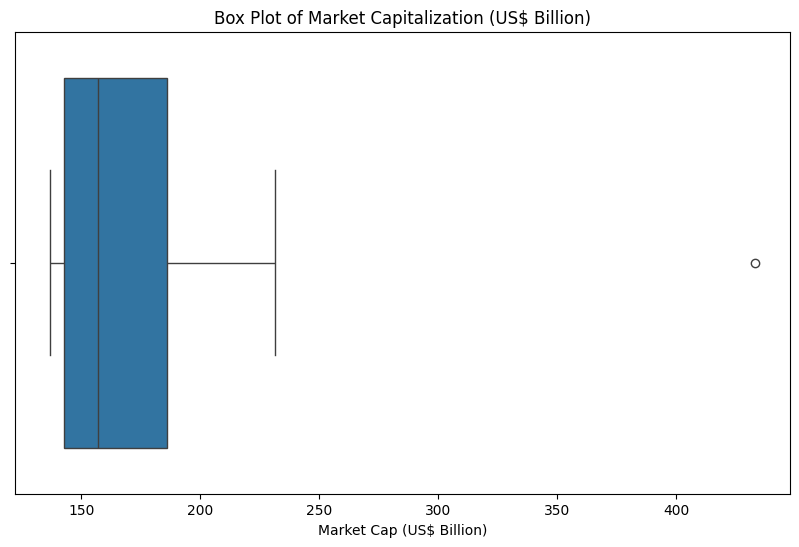

In [15]:
# Write code for outlier analysis

# Summary statistics
df_spark.describe(['Market_Cap_USD_Billion']).show()

# Box plot (using pandas for visualization)
# Convert the relevant column to pandas for plotting
market_cap_pandas = df_spark.select('Market_Cap_USD_Billion').toPandas()

plt.figure(figsize=(10, 6))
sns.boxplot(x=market_cap_pandas['Market_Cap_USD_Billion'])
plt.title('Box Plot of Market Capitalization (US$ Billion)')
plt.xlabel('Market Cap (US$ Billion)')
plt.show()

Saving the Cleaned Dataset into a CSV File into the S3 Bucket


#**3. Exploratory Data Analysis** <font color = red>[40 marks]</font> <br>


##**3.1. Conversion from PySpark to Pandas DataFrame** <font color = red>[5 marks]</font> <br>

Convert PySpark DataFrame to Pandas DataFrame for visualization

In [18]:
# Convert PySpark DataFrame to Pandas DataFrame
df_pandas = df_spark.toPandas()
display(df_pandas.head())

,Rank,Bank_Name,Market_Cap_USD_Billion
0,1,JPMorgan Chase,432.92
1,2,Bank of America,231.52
2,3,Industrial and Commercial Bank of China,194.56
3,4,Agricultural Bank of China,160.68
4,5,HDFC Bank,157.91


##**3.2. Market Capitalization** <font color = red>[5 marks]</font> <br>

Analyze the distribution of market capitalization using a histogram

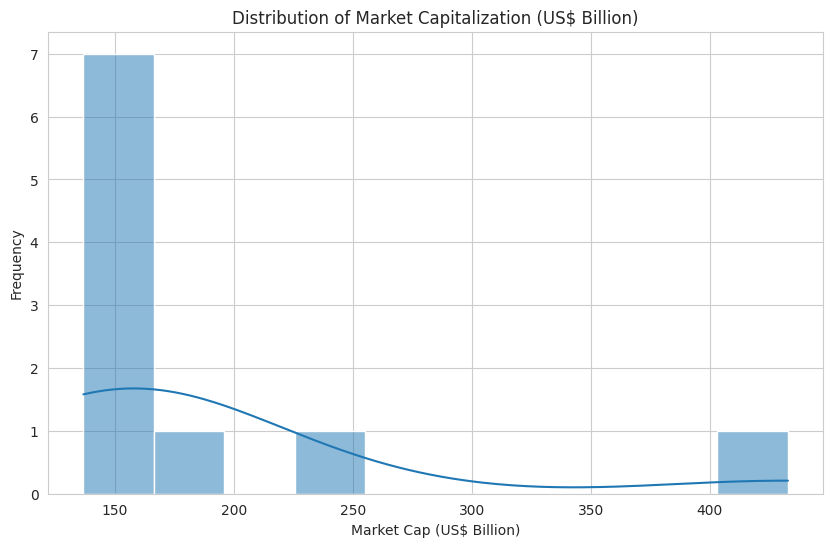

In [19]:
# Distribution of Market Cap (US$ Billion)

# Set the style for seaborn
sns.set_style('whitegrid')

# Plot the distribution of market cap
plt.figure(figsize=(10, 6))
sns.histplot(df_pandas['Market_Cap_USD_Billion'], kde=True, bins=10)
plt.title('Distribution of Market Capitalization (US$ Billion)')
plt.xlabel('Market Cap (US$ Billion)')
plt.ylabel('Frequency')
plt.show()

##**3.3. Top 10 Banks** <font color = red>[5 Marks]</font> <br>

Identify the top 10 banks by market capitalization using a bar chart

/tmp/ipython-input-4245215274.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Market_Cap_USD_Billion', y='Bank_Name', data=df_top_10, palette='viridis')


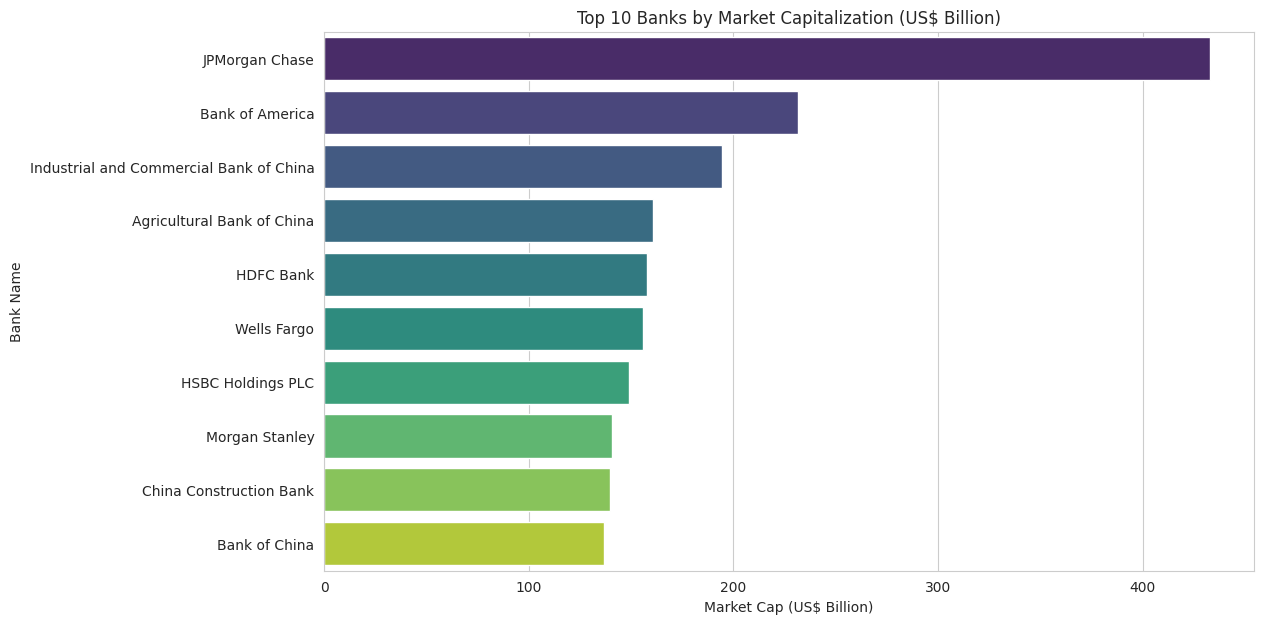

In [20]:
# Top 10 Banks by Market Cap

# Sort the DataFrame by market cap in descending order
df_top_10 = df_pandas.sort_values(by='Market_Cap_USD_Billion', ascending=False).head(10)

# Plot the top 10 banks by market cap
plt.figure(figsize=(12, 7))
sns.barplot(x='Market_Cap_USD_Billion', y='Bank_Name', data=df_top_10, palette='viridis')
plt.title('Top 10 Banks by Market Capitalization (US$ Billion)')
plt.xlabel('Market Cap (US$ Billion)')
plt.ylabel('Bank Name')
plt.show()

##**3.4. Market Cap vs Bank Ranking** <font color = red>[5 Marks]</font> <br>

Visualize the relationship between market capitalization and bank ranking using a scatter plot

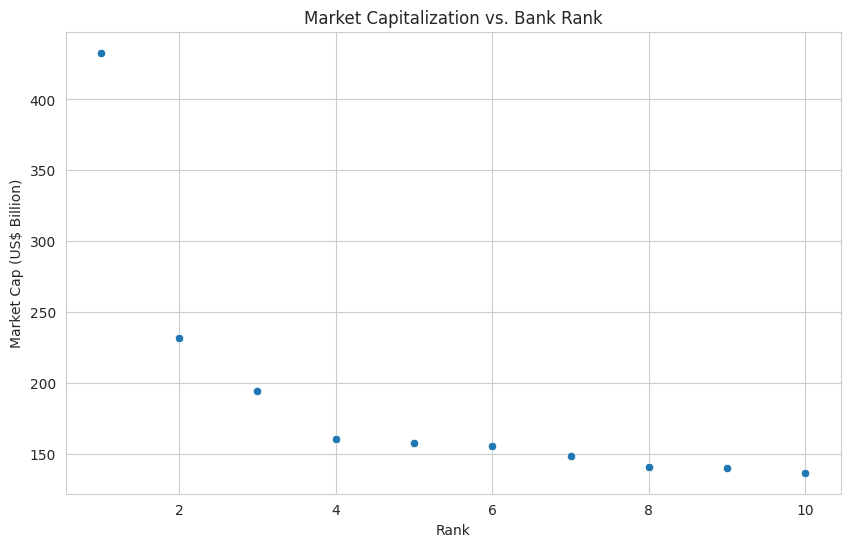

In [21]:
# Market Cap vs Rank

# Plot market cap vs rank
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rank', y='Market_Cap_USD_Billion', data=df_pandas)
plt.title('Market Capitalization vs. Bank Rank')
plt.xlabel('Rank')
plt.ylabel('Market Cap (US$ Billion)')
plt.show()

##**3.5. Market Cap Analysis** <font color = red>[5 Marks]</font> <br>

Use a boxplot to examine the spread and outliers in market capitalization.

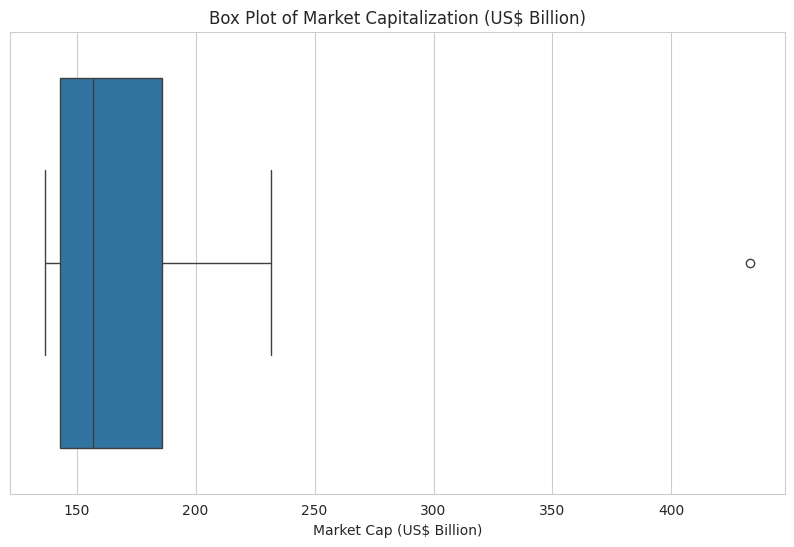

In [22]:
# Boxplot of Market Cap
#To show the spread and outliers in the market capitalization data.

# Plot a boxplot of market cap
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_pandas['Market_Cap_USD_Billion'])
plt.title('Box Plot of Market Capitalization (US$ Billion)')
plt.xlabel('Market Cap (US$ Billion)')
plt.show()

##**3.6. Market Cap Quartile Distribution** <font color = red>[5 Marks]</font> <br>

Display the quartile distribution of market capitalization using a violin plot.

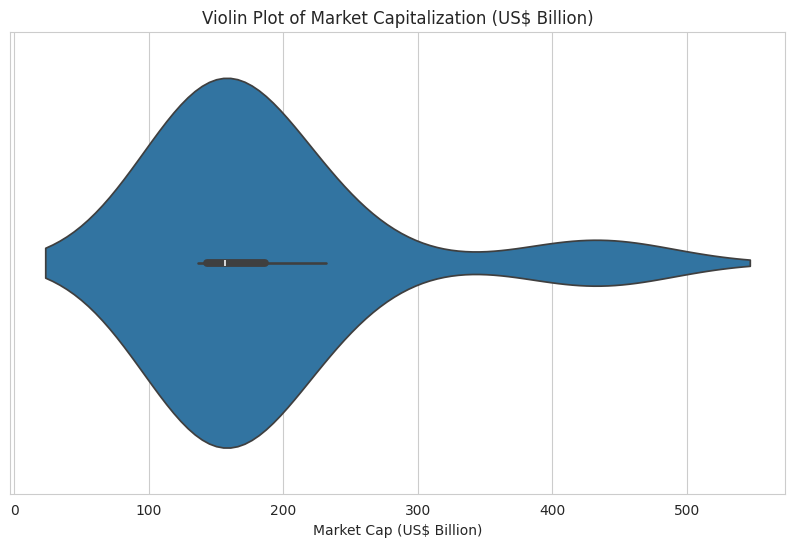

In [23]:
# Market Cap Distribution by Quartile

# Plot a violin plot of market cap
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_pandas['Market_Cap_USD_Billion'])
plt.title('Violin Plot of Market Capitalization (US$ Billion)')
plt.xlabel('Market Cap (US$ Billion)')
plt.show()

##**3.7. Cumulative Market Share Analysis** <font color = red>[5 Marks]</font> <br>

Compute cumulative market share and visualize it with a line plot.

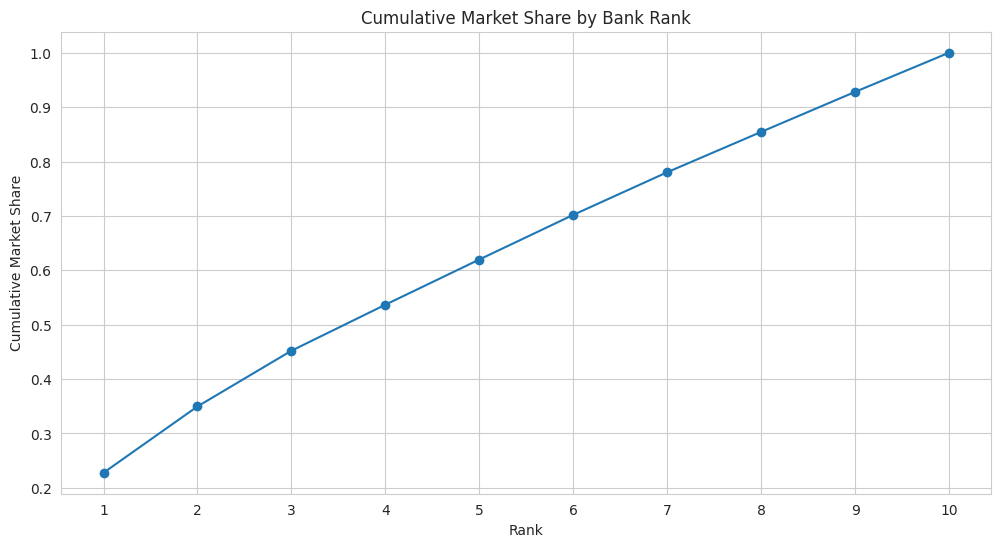

In [24]:
# Cumulative Market Share

# Sort by Market Cap in descending order
df_sorted = df_pandas.sort_values(by='Market_Cap_USD_Billion', ascending=False).reset_index(drop=True)

# Calculate Cumulative Market Share
df_sorted['Cumulative_Market_Share'] = df_sorted['Market_Cap_USD_Billion'].cumsum() / df_sorted['Market_Cap_USD_Billion'].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['Rank'], df_sorted['Cumulative_Market_Share'], marker='o', linestyle='-')
plt.title('Cumulative Market Share by Bank Rank')
plt.xlabel('Rank')
plt.ylabel('Cumulative Market Share')
plt.grid(True)
plt.xticks(df_sorted['Rank'])
plt.show()

##**3.8. Categorising Banks** <font color = red>[5 Marks]</font> <br>

Categorize banks into market capitalization ranges and analyze their distribution using a bar chart.

/tmp/ipython-input-257679884.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range_counts.index, y=range_counts.values, palette='viridis')


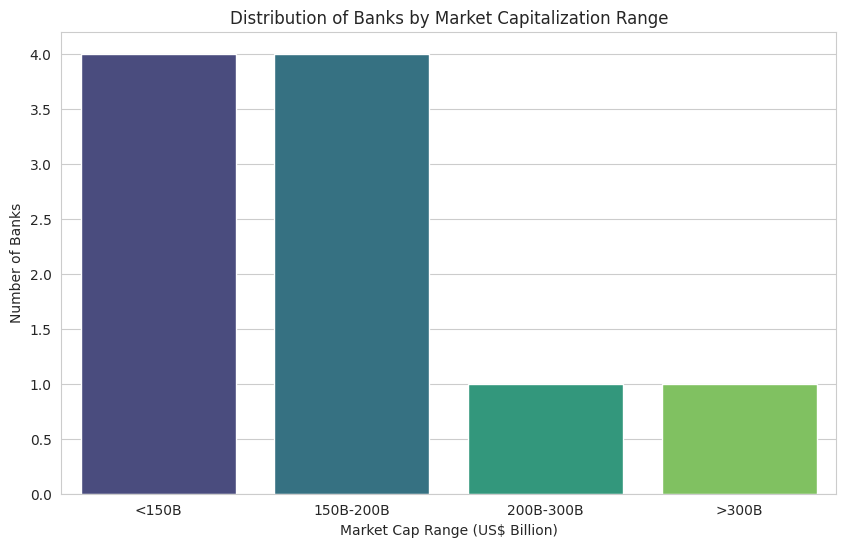

In [25]:
# Market Cap Range Distribution
# Create market cap ranges
bins = [0, 150, 200, 300, 500]  # Define your desired ranges
labels = ['<150B', '150B-200B', '200B-300B', '>300B']
df_pandas['Market_Cap_Range'] = pd.cut(df_pandas['Market_Cap_USD_Billion'], bins=bins, labels=labels, right=False)

# Count the number of banks in each range
range_counts = df_pandas['Market_Cap_Range'].value_counts().sort_index()

# Plot the distribution of market cap ranges
plt.figure(figsize=(10, 6))
sns.barplot(x=range_counts.index, y=range_counts.values, palette='viridis')
plt.title('Distribution of Banks by Market Capitalization Range')
plt.xlabel('Market Cap Range (US$ Billion)')
plt.ylabel('Number of Banks')
plt.show()

##**3.9. Visualise Market Share Distribution** <font color = red>[5 Marks]</font> <br>


Calculate and display market share distribution among the top 10 banks using a pie chart.

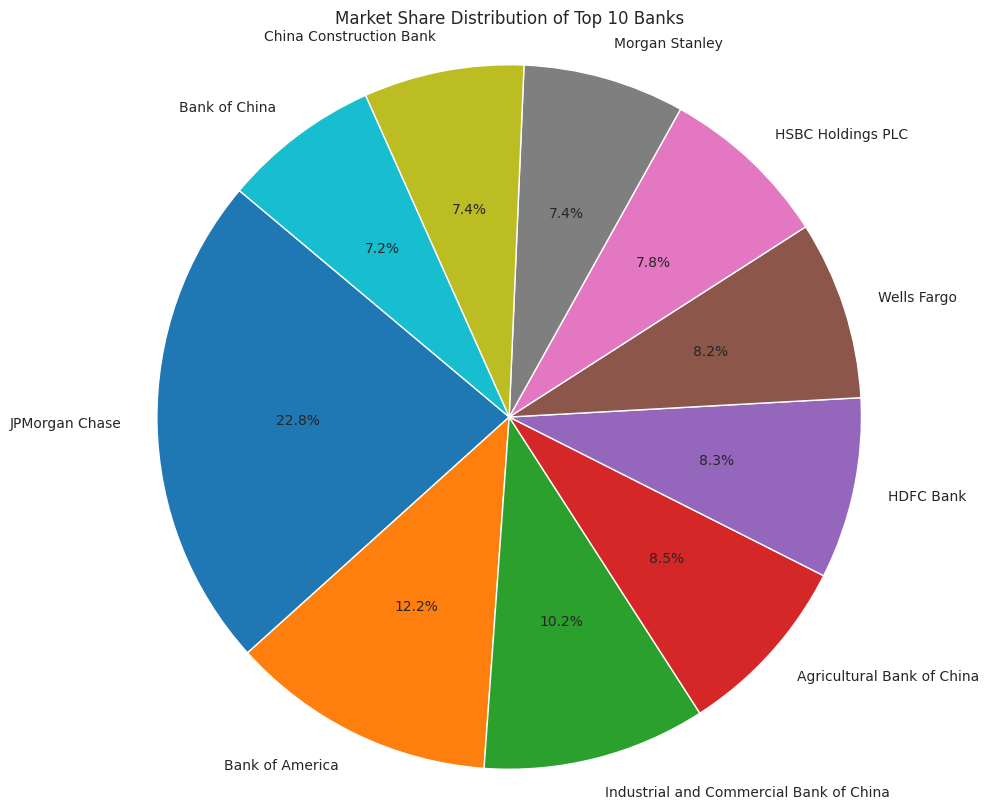

In [26]:
# Top 10 Banks Market Share
# Calculate market share percentage for top 10 banks
df_top_10['Market_Share_Percentage'] = (df_top_10['Market_Cap_USD_Billion'] / df_top_10['Market_Cap_USD_Billion'].sum()) * 100

# Plot
plt.figure(figsize=(10, 10))
plt.pie(df_top_10['Market_Share_Percentage'], labels=df_top_10['Bank_Name'], autopct='%1.1f%%', startangle=140)
plt.title('Market Share Distribution of Top 10 Banks')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#**4. ETL and Querying** <font color = red>[45 marks]</font> <br>

In [ ]:
#Imports & Spark Session Initialization

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit, round
import logging
from datetime import datetime
import sqlite3
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .getOrCreate()

# Logging Configuration
logfile = "code_log.txt"

In [ ]:
#Logging Function

def log_progress(msg):
    timeformat = '%Y-%h-%d-%H:%M:%S'
    timestamp = datetime.now().strftime(timeformat)
    with open(logfile, 'a') as f:
        f.write(f"{timestamp} : {msg}\n")

In [ ]:
# Import required functions
from pyspark.sql.functions import col, avg, sum, count, desc, asc, round, lag, dense_rank, ntile, when, first, lead
from pyspark.sql.window import Window

# First, let's rename your columns to match our queries (if needed)

# Create window specifications


##**4.1. Market Capitalization Analysis** <font color = red>[3 marks]</font> <br>

Q: Perform Advanced Market Capitalization Analysis with Growth Metrics

In [31]:
# Query: Advanced Market Cap Analysis with Growth Metrics
import logging
from datetime import datetime
from pyspark.sql.window import Window
from pyspark.sql.functions import col, lag

logfile = "code_log.txt"

def log_progress(msg):
    timeformat = '%Y-%h-%d-%H:%M:%S'
    timestamp = datetime.now().strftime(timeformat)
    with open(logfile, 'a') as f:
        f.write(f"{timestamp} : {msg}\n")


log_progress("Starting ETL Querying - Advanced Market Capitalization Analysis")

windowSpec = Window.orderBy("Rank")

df_advanced_analysis = df_spark.withColumn("Market_Cap_Growth_vs_Prev",
                                            col("Market_Cap_USD_Billion") - lag("Market_Cap_USD_Billion", 1).over(windowSpec))

df_advanced_analysis.show()

log_progress("Completed ETL Querying - Advanced Market Capitalization Analysis")

+----+--------------------+----------------------+-------------------------+
|Rank|           Bank_Name|Market_Cap_USD_Billion|Market_Cap_Growth_vs_Prev|
+----+--------------------+----------------------+-------------------------+
|   1|      JPMorgan Chase|                432.92|                     NULL|
|   2|     Bank of America|                231.52|                   -201.4|
|   3|Industrial and Co...|                194.56|       -36.96000000000001|
|   4|Agricultural Bank...|                160.68|      -33.879999999999995|
|   5|           HDFC Bank|                157.91|      -2.7700000000000102|
|   6|         Wells Fargo|                155.87|       -2.039999999999992|
|   7|   HSBC Holdings PLC|                 148.9|       -6.969999999999999|
|   8|      Morgan Stanley|                140.83|       -8.069999999999993|
|   9|China Constructio...|                139.82|      -1.0100000000000193|
|  10|       Bank of China|                136.81|       -3.009999999999991|

##4.2.**Market Concentration Analysis** <font color = red>[6 marks]</font> <br>

Q: Analyze Market Concentration and Categorize Banks Based on Market Share Tiers

In [32]:
# Market Concentration Analysis
import logging
from datetime import datetime
from pyspark.sql.functions import col, avg, sum, count, desc, asc, round, lag, dense_rank, ntile, when, first, lead
from pyspark.sql.types import DoubleType # Import DoubleType

logfile = "code_log.txt"

def log_progress(msg):
    timeformat = '%Y-%h-%d-%H:%M:%S'
    timestamp = datetime.now().strftime(timeformat)
    with open(logfile, 'a') as f:
        f.write(f"{timestamp} : {msg}\n")

log_progress("Starting ETL Querying - Market Concentration Analysis")

# Cast the result of sum to DoubleType
total_market_cap = df_spark.agg(sum("Market_Cap_USD_Billion").cast(DoubleType())).collect()[0][0]

df_market_share = df_spark.withColumn("Market_Share_Percentage", (col("Market_Cap_USD_Billion") / total_market_cap) * 100)

df_market_share_tiers = df_market_share.withColumn("Market_Share_Tier",
                                                   when(col("Market_Share_Percentage") > 10, "Tier 1 (Dominant)")
                                                   .when(col("Market_Share_Percentage") > 5, "Tier 2 (Major)")
                                                   .otherwise("Tier 3 (Significant)"))

df_market_share_tiers.show()

log_progress("Completed ETL Querying - Market Concentration Analysis")

+----+--------------------+----------------------+-----------------------+-----------------+
|Rank|           Bank_Name|Market_Cap_USD_Billion|Market_Share_Percentage|Market_Share_Tier|
+----+--------------------+----------------------+-----------------------+-----------------+
|   1|      JPMorgan Chase|                432.92|     22.787421966291543|Tier 1 (Dominant)|
|   2|     Bank of America|                231.52|      12.18641766062048|Tier 1 (Dominant)|
|   3|Industrial and Co...|                194.56|     10.240970197176575|Tier 1 (Dominant)|
|   4|Agricultural Bank...|                160.68|       8.45764335568633|   Tier 2 (Major)|
|   5|           HDFC Bank|                157.91|      8.311840069059173|   Tier 2 (Major)|
|   6|         Wells Fargo|                155.87|       8.20446147529766|   Tier 2 (Major)|
|   7|   HSBC Holdings PLC|                 148.9|     7.8375846132791525|   Tier 2 (Major)|
|   8|      Morgan Stanley|                140.83|       7.41280752913

##**4.3. Market Capitalization Distribution** <font color = red>[6 marks]</font> <br>

Q: Examine Statistical Distribution of Market Capitalization Using Quartile Analysis

In [33]:
# Import required functions
from pyspark.sql.functions import (col, avg, sum, count, desc, asc, round, lag,
                                 dense_rank, ntile, when, first, lead, min, max, lit)
from pyspark.sql.window import Window

# Query 3: Statistical Distribution Analysis
log_progress("Starting ETL Querying - Statistical Distribution Analysis")

df_quartile_analysis = df_spark.select(
    min("Market_Cap_USD_Billion").alias("Min_Market_Cap"),
    max("Market_Cap_USD_Billion").alias("Max_Market_Cap"),
    avg("Market_Cap_USD_Billion").alias("Average_Market_Cap")
).collect()[0]

print("Statistical Distribution of Market Capitalization:")
print(f"  Minimum Market Cap: {df_quartile_analysis['Min_Market_Cap']:.2f} US$ Billion")
print(f"  Maximum Market Cap: {df_quartile_analysis['Max_Market_Cap']:.2f} US$ Billion")
print(f"  Average Market Cap: {df_quartile_analysis['Average_Market_Cap']:.2f} US$ Billion")

# Calculate quartiles
quartiles = df_spark.approxQuantile("Market_Cap_USD_Billion", [0.25, 0.5, 0.75], 0.01)

print("\nQuartile Analysis of Market Capitalization:")
print(f"  Q1 (25th percentile): {quartiles[0]:.2f} US$ Billion")
print(f"  Q2 (50th percentile/Median): {quartiles[1]:.2f} US$ Billion")
print(f"  Q3 (75th percentile): {quartiles[2]:.2f} US$ Billion")


log_progress("Completed ETL Querying - Statistical Distribution Analysis")

Statistical Distribution of Market Capitalization:
  Minimum Market Cap: 136.81 US$ Billion
  Maximum Market Cap: 432.92 US$ Billion
  Average Market Cap: 189.98 US$ Billion

Quartile Analysis of Market Capitalization:
  Q1 (25th percentile): 140.83 US$ Billion
  Q2 (50th percentile/Median): 155.87 US$ Billion
  Q3 (75th percentile): 194.56 US$ Billion


##**4.4. Comparative Size Analysis** <font color = red>[6 marks]</font> <br>

Q: Conduct Comparative Size Analysis to Classify Banks by Relative Market Size

In [34]:
# Comparative Size Analysis
log_progress("Starting ETL Querying - Comparative Size Analysis")

# Calculate average market cap
average_market_cap = df_spark.agg(avg("Market_Cap_USD_Billion")).collect()[0][0]

df_comparative_size = df_spark.withColumn("Relative_Size", col("Market_Cap_USD_Billion") / average_market_cap) \
    .withColumn("Size_Category",
                when(col("Relative_Size") > 2, "Very Large")
                .when(col("Relative_Size") > 1, "Large")
                .when(col("Relative_Size") > 0.5, "Medium")
                .otherwise("Small"))

df_comparative_size.show()

log_progress("Completed ETL Querying - Comparative Size Analysis")

+----+--------------------+----------------------+------------------+-------------+
|Rank|           Bank_Name|Market_Cap_USD_Billion|     Relative_Size|Size_Category|
+----+--------------------+----------------------+------------------+-------------+
|   1|      JPMorgan Chase|                432.92| 2.278742196629154|   Very Large|
|   2|     Bank of America|                231.52|1.2186417660620479|        Large|
|   3|Industrial and Co...|                194.56|1.0240970197176573|        Large|
|   4|Agricultural Bank...|                160.68|0.8457643355686327|       Medium|
|   5|           HDFC Bank|                157.91|0.8311840069059173|       Medium|
|   6|         Wells Fargo|                155.87|0.8204461475297659|       Medium|
|   7|   HSBC Holdings PLC|                 148.9|0.7837584613279152|       Medium|
|   8|      Morgan Stanley|                140.83|0.7412807529134339|       Medium|
|   9|China Constructio...|                139.82|0.7359644597909274|       

##**4.5. Market Growth Analysis** <font color = red>[6 marks]</font> <br>

Q: Evaluate Market Growth and Identify Gaps Between Consecutive Banks

In [35]:
# Growth and Gap Analysis
log_progress("Starting ETL Querying - Market Growth and Gap Analysis")

windowSpec = Window.orderBy("Rank")

df_growth_gap = df_spark.withColumn("Market_Cap_Previous_Rank", lag("Market_Cap_USD_Billion", 1).over(windowSpec)) \
                        .withColumn("Market_Cap_Gap_vs_Prev",
                                    col("Market_Cap_USD_Billion") - col("Market_Cap_Previous_Rank")) \
                        .withColumn("Market_Cap_Growth_Rate_vs_Prev",
                                    (col("Market_Cap_Gap_vs_Prev") / col("Market_Cap_Previous_Rank")) * 100)

df_growth_gap.show()

log_progress("Completed ETL Querying - Market Growth and Gap Analysis")

+----+--------------------+----------------------+------------------------+----------------------+------------------------------+
|Rank|           Bank_Name|Market_Cap_USD_Billion|Market_Cap_Previous_Rank|Market_Cap_Gap_vs_Prev|Market_Cap_Growth_Rate_vs_Prev|
+----+--------------------+----------------------+------------------------+----------------------+------------------------------+
|   1|      JPMorgan Chase|                432.92|                    NULL|                  NULL|                          NULL|
|   2|     Bank of America|                231.52|                  432.92|                -201.4|            -46.52129723736487|
|   3|Industrial and Co...|                194.56|                  231.52|    -36.96000000000001|            -15.96406357982032|
|   4|Agricultural Bank...|                160.68|                  194.56|   -33.879999999999995|           -17.413651315789473|
|   5|           HDFC Bank|                157.91|                  160.68|   -2.770000000

##**4.6. Market Dominance Analysis** <font color = red>[6 marks]</font> <br>

Q: Assess Market Dominance by Measuring Cumulative Share and Dominance Score

In [36]:
# Market Dominance Analysis
log_progress("Starting ETL Querying - Market Dominance Analysis")

windowSpec = Window.orderBy("Rank")

# Calculate Cumulative Market Share
total_market_cap = df_spark.agg(sum("Market_Cap_USD_Billion")).collect()[0][0]
df_dominance = df_spark.withColumn("Cumulative_Market_Share",
                                    sum("Market_Cap_USD_Billion").over(windowSpec) / total_market_cap * 100)

# Calculate Dominance Score (Example: Market Share of top bank divided by the bank's own share)
df_dominance = df_dominance.withColumn("Dominance_Score",
                                       first("Market_Cap_USD_Billion").over(Window.orderBy(asc("Rank"))) / col("Market_Cap_USD_Billion"))

df_dominance.show()

log_progress("Completed ETL Querying - Market Dominance Analysis")

+----+--------------------+----------------------+-----------------------+------------------+
|Rank|           Bank_Name|Market_Cap_USD_Billion|Cumulative_Market_Share|   Dominance_Score|
+----+--------------------+----------------------+-----------------------+------------------+
|   1|      JPMorgan Chase|                432.92|     22.787421966291543|               1.0|
|   2|     Bank of America|                231.52|     34.973839626912024|1.8699032480995161|
|   3|Industrial and Co...|                194.56|      45.21480982408859| 2.225123355263158|
|   4|Agricultural Bank...|                160.68|      53.67245317977493|2.6942992282798106|
|   5|           HDFC Bank|                157.91|       61.9842932488341|2.7415616490405927|
|   6|         Wells Fargo|                155.87|      70.18875472413175| 2.777442740745493|
|   7|   HSBC Holdings PLC|                 148.9|      78.02633933741092| 2.907454667562122|
|   8|      Morgan Stanley|                140.83|      85.4

##**4.7. Segment-Wise Bank Analysis** <font color = red>[6 marks]</font> <br>

Q: Analyze Segment-Wise Bank Performance Based on Market Capitalization Ranges

In [37]:
# Segment Performance Analysis
log_progress("Starting ETL Querying - Segment Performance Analysis")

# Define market cap ranges (same as in EDA)
bins = [0, 150, 200, 300, 500]
labels = ['<150B', '150B-200B', '200B-300B', '>300B']

# Categorize banks into market cap ranges
df_spark_ranges = df_spark.withColumn("Market_Cap_Range",
                                     when(col("Market_Cap_USD_Billion") < 150, "<150B")
                                     .when((col("Market_Cap_USD_Billion") >= 150) & (col("Market_Cap_USD_Billion") < 200), "150B-200B")
                                     .when((col("Market_Cap_USD_Billion") >= 200) & (col("Market_Cap_USD_Billion") < 300), "200B-300B")
                                     .otherwise(">300B"))

# Analyze performance by segment (e.g., count of banks in each segment)
df_segment_performance = df_spark_ranges.groupBy("Market_Cap_Range").agg(
    count("*").alias("Number_of_Banks"),
    avg("Market_Cap_USD_Billion").alias("Average_Market_Cap_in_Segment")
).orderBy("Market_Cap_Range") # Order by range for better readability

df_segment_performance.show()

log_progress("Completed ETL Querying - Segment Performance Analysis")

+----------------+---------------+-----------------------------+
|Market_Cap_Range|Number_of_Banks|Average_Market_Cap_in_Segment|
+----------------+---------------+-----------------------------+
|       150B-200B|              4|                      167.255|
|       200B-300B|              1|                       231.52|
|           <150B|              4|                       141.59|
|           >300B|              1|                       432.92|
+----------------+---------------+-----------------------------+



##**4.8. Performance Dashboard** <font color = red>[6 marks]</font> <br>

Q: Generate a Comprehensive Performance Dashboard for Bank Rankings and Metrics

In [38]:
# Comprehensive Performance Dashboard
log_progress("Starting ETL Querying - Comprehensive Performance Dashboard")

# Join the DataFrames from previous steps
# Starting with the base DataFrame and joining others on 'Rank' and 'Bank_Name'
df_dashboard = df_spark.join(df_advanced_analysis.select("Rank", "Market_Cap_Growth_vs_Prev"), on="Rank", how="left") \
                       .join(df_market_share_tiers.select("Rank", "Market_Share_Percentage", "Market_Share_Tier"), on="Rank", how="left") \
                       .join(df_comparative_size.select("Rank", "Relative_Size", "Size_Category"), on="Rank", how="left") \
                       .join(df_growth_gap.select("Rank", "Market_Cap_Previous_Rank", "Market_Cap_Gap_vs_Prev", "Market_Cap_Growth_Rate_vs_Prev"), on="Rank", how="left") \
                       .join(df_dominance.select("Rank", "Cumulative_Market_Share", "Dominance_Score"), on="Rank", how="left")

# Select and reorder columns for the dashboard
df_dashboard = df_dashboard.select(
    "Rank",
    "Bank_Name",
    "Market_Cap_USD_Billion",
    round("Market_Share_Percentage", 2).alias("Market_Share_Percentage"),
    "Market_Share_Tier",
    round("Relative_Size", 2).alias("Relative_Size"),
    "Size_Category",
    round("Market_Cap_Growth_vs_Prev", 2).alias("Market_Cap_Growth_vs_Prev"),
    round("Market_Cap_Gap_vs_Prev", 2).alias("Market_Cap_Gap_vs_Prev"),
    round("Market_Cap_Growth_Rate_vs_Prev", 2).alias("Market_Cap_Growth_Rate_vs_Prev"),
    round("Cumulative_Market_Share", 2).alias("Cumulative_Market_Share"),
    round("Dominance_Score", 2).alias("Dominance_Score")
).orderBy("Rank")

# Show the comprehensive dashboard
df_dashboard.show(truncate=False)

log_progress("Completed ETL Querying - Comprehensive Performance Dashboard")

+----+---------------------------------------+----------------------+-----------------------+-----------------+-------------+-------------+-------------------------+----------------------+------------------------------+-----------------------+---------------+
|Rank|Bank_Name                              |Market_Cap_USD_Billion|Market_Share_Percentage|Market_Share_Tier|Relative_Size|Size_Category|Market_Cap_Growth_vs_Prev|Market_Cap_Gap_vs_Prev|Market_Cap_Growth_Rate_vs_Prev|Cumulative_Market_Share|Dominance_Score|
+----+---------------------------------------+----------------------+-----------------------+-----------------+-------------+-------------+-------------------------+----------------------+------------------------------+-----------------------+---------------+
|1   |JPMorgan Chase                         |432.92                |22.79                  |Tier 1 (Dominant)|2.28         |Very Large   |NULL                     |NULL                  |NULL                          |2

#5. Visualization Integration

In [39]:
# Visualization Setup Section

# 1. Prepare data for visualization platforms
df_dashboard_pandas = df_dashboard.toPandas()
display(df_dashboard_pandas.head())

# 2. Generate Tableau connection instructions

# 3. Generate Power BI connection instructions

# 4. Execute visualization setup
# 5. Sample Dashboard Layout (Documentation)

,Rank,Bank_Name,Market_Cap_USD_Billion,Market_Share_Percentage,Market_Share_Tier,Relative_Size,Size_Category,Market_Cap_Growth_vs_Prev,Market_Cap_Gap_vs_Prev,Market_Cap_Growth_Rate_vs_Prev,Cumulative_Market_Share,Dominance_Score
0,1,JPMorgan Chase,432.92,22.79,Tier 1 (Dominant),2.28,Very Large,NaN,NaN,NaN,22.79,1.00
1,2,Bank of America,231.52,12.19,Tier 1 (Dominant),1.22,Large,-201.40,-201.40,-46.52,34.97,1.87
2,3,Industrial and Commercial Bank of China,194.56,10.24,Tier 1 (Dominant),1.02,Large,-36.96,-36.96,-15.96,45.21,2.23
3,4,Agricultural Bank of China,160.68,8.46,Tier 2 (Major),0.85,Medium,-33.88,-33.88,-17.41,53.67,2.69
4,5,HDFC Bank,157.91,8.31,Tier 2 (Major),0.83,Medium,-2.77,-2.77,-1.72,61.98,2.74


In [ ]:
# # Before running this code, make sure you have configured your AWS credentials
# # and have the necessary hadoop-aws library in your Spark environment.

# # Define your S3 bucket path
# # Provide
# s3_output_path = "s3a://your-s3-bucket-name/your-output-folder/cleaned_bank_data.csv"

# # Save the PySpark DataFrame as a CSV file in the S3 bucket
# df_spark.write.csv(s3_output_path, header=True, mode="overwrite")

# print(f"Cleaned data saved to S3 bucket: {s3_output_path}")

UnsupportedOperationException: None